<a href="https://colab.research.google.com/github/realalyeasin/Machine-Learning/blob/main/%F0%9F%8E%9E%EF%B8%8FImage_Classification_%7C%7C_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [10]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


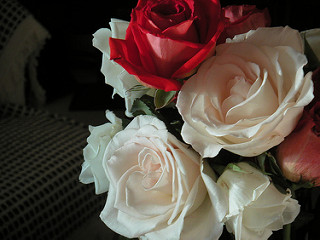

In [18]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[23]))

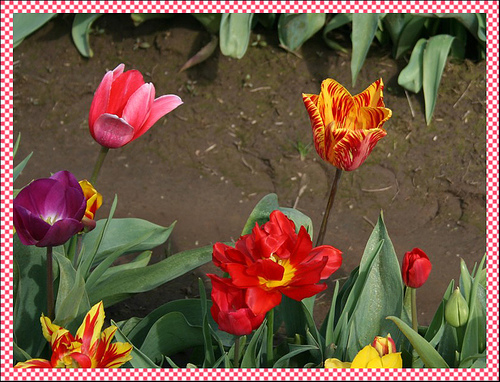

In [21]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[4]))

**Creating Dataset**

---

---





In [23]:
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "training",
    seed = 123,
    batch_size = batch_size,
    image_size = (img_height, img_width) 
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset = "validation",
    seed=123,
    batch_size = batch_size,
    image_size = (img_height, img_width)
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [33]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


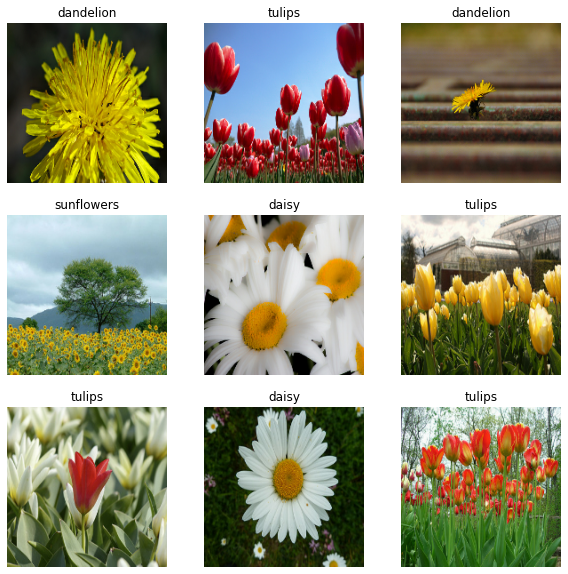

In [38]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [40]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


**Configuring the dataset for performance**

---



---



In [41]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**Standardizing Data**

---



---



In [48]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y : (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
image = image_batch[7]
print(np.min(image), np.max(image))

0.0029412664 1.0


**Creat Model**

---



---



In [53]:
num_classes = 5

model = Sequential([
                    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16,3, padding = 'same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32,3, padding = 'same', activation='relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64,3, padding = 'same', activation='relu'),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

**Compile Model**

---



---



In [55]:
model.compile(optimizer='Adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 129600)           

**Train Model**

---



---



In [57]:
epochs = 10
history = model.fit(train_ds, validation_data = val_ds, epochs = epochs)

Epoch 1/10
92/92 [==============================] - 102s 1s/step - loss: 1.7956 - accuracy: 0.4179 - val_loss: 1.1128 - val_accuracy: 0.5572
Epoch 2/10
92/92 [==============================] - 100s 1s/step - loss: 1.0414 - accuracy: 0.5913 - val_loss: 1.0171 - val_accuracy: 0.5967
Epoch 3/10
92/92 [==============================] - 100s 1s/step - loss: 0.8003 - accuracy: 0.6972 - val_loss: 1.0089 - val_accuracy: 0.6185
Epoch 4/10
92/92 [==============================] - 100s 1s/step - loss: 0.5029 - accuracy: 0.8181 - val_loss: 1.1569 - val_accuracy: 0.5954
Epoch 5/10
92/92 [==============================] - 100s 1s/step - loss: 0.2533 - accuracy: 0.9101 - val_loss: 1.4479 - val_accuracy: 0.5913
Epoch 6/10
92/92 [==============================] - 101s 1s/step - loss: 0.1553 - accuracy: 0.9520 - val_loss: 1.7257 - val_accuracy: 0.5681
Epoch 7/10
92/92 [==============================] - 101s 1s/step - loss: 0.0864 - accuracy: 0.9734 - val_loss: 1.7291 - val_accuracy: 0.5899
Epoch 8/10
92

**Training Results**

---



---



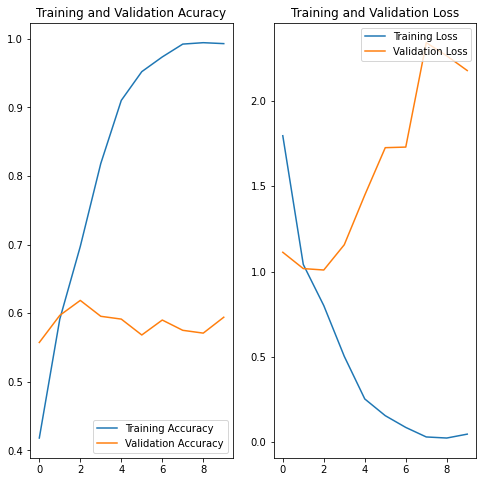

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc='lower right')
plt.title("Training and Validation Acuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")

plt.show()

**Data Augmentation**

---



---



In [61]:
data_augmentation = keras.Sequential([
                                      layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
                                      layers.experimental.preprocessing.RandomRotation(0.1),
                                      layers.experimental.preprocessing.RandomZoom(0.1)
])

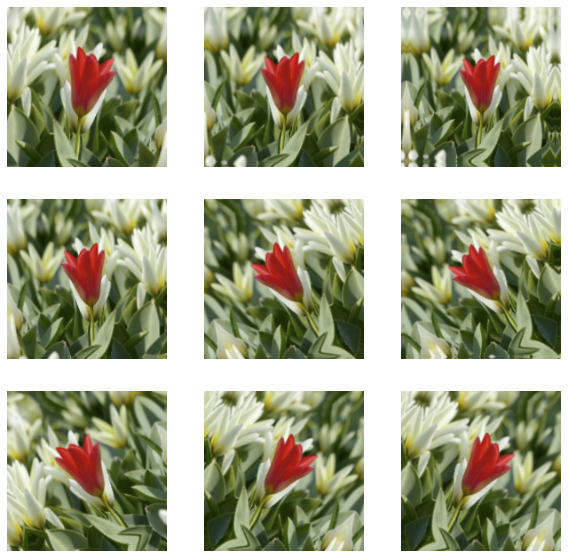

In [67]:
plt.figure(figsize=(10,10))
for imgaes, _ in train_ds.take(1):
  for i in range(9):
    augmentated_images = data_augmentation(images)
    ax = plt.subplot(3,3, i+1)
    plt.imshow(augmentated_images[6].numpy().astype("uint8"))
    plt.axis("off")

**Dropout**

---



---



In [68]:
model = keras.Sequential([
        data_augmentation,
        layers.experimental.preprocessing.Rescaling(1./255),
        layers.Conv2D(16,3, padding = 'same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(32,3, padding = 'same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Conv2D(64,3, padding = 'same', activation='relu'),
        layers.MaxPooling2D(),
        layers.Dropout(0.2),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
])

In [69]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_7 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [71]:
epochs = 15
history = model.fit(
         train_ds,
         validation_data = val_ds,
         epochs = epochs
)

Epoch 1/15
92/92 [==============================] - 107s 1s/step - loss: 1.3025 - accuracy: 0.4520 - val_loss: 1.0866 - val_accuracy: 0.5613
Epoch 2/15
92/92 [==============================] - 105s 1s/step - loss: 1.0567 - accuracy: 0.5824 - val_loss: 0.9854 - val_accuracy: 0.6185
Epoch 3/15
92/92 [==============================] - 106s 1s/step - loss: 0.9604 - accuracy: 0.6233 - val_loss: 0.9909 - val_accuracy: 0.6131
Epoch 4/15
92/92 [==============================] - 106s 1s/step - loss: 0.9130 - accuracy: 0.6437 - val_loss: 0.8737 - val_accuracy: 0.6853
Epoch 5/15
92/92 [==============================] - 106s 1s/step - loss: 0.8402 - accuracy: 0.6734 - val_loss: 0.9154 - val_accuracy: 0.6499
Epoch 6/15
92/92 [==============================] - 105s 1s/step - loss: 0.7964 - accuracy: 0.6938 - val_loss: 0.8008 - val_accuracy: 0.7003
Epoch 7/15
92/92 [==============================] - 105s 1s/step - loss: 0.7454 - accuracy: 0.7146 - val_loss: 0.7886 - val_accuracy: 0.6907
Epoch 8/15
92

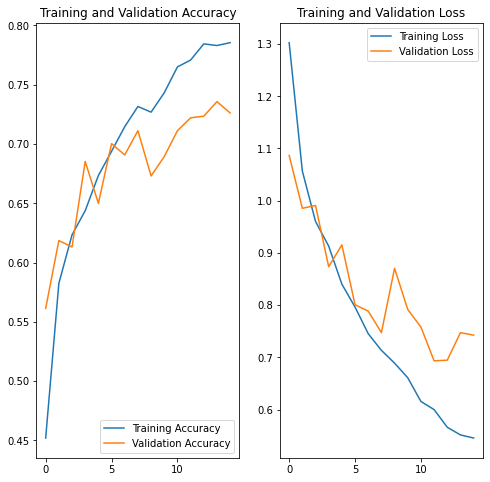

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, val_acc, label = "Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")

plt.show()

In [80]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin = sunflower_url)

img = keras.preprocessing.image.load_img(sunflower_path, target_size=(img_height, img_width))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likly belongs to {} with a {:.2f} percent of confidence." .format(class_names[np.argmax(score)], 100*np.max(score)))

This image most likly belongs to sunflowers with a 99.95 percent of confidence.
